---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [595]:
df = pd.read_csv('../../data/processed-data/processed_df.csv', index_col=None)

In [596]:
#Dummify Borough column
df = pd.get_dummies(data=df, columns=['Borough'], dtype=float, drop_first=True)
# Drop categorical columns we dont need
df.drop(columns=['Unnamed: 0', 'DBN', 'School Name'], inplace=True)


In [597]:
df.dtypes.value_counts()

float64    46
int64       1
Name: count, dtype: int64

## Linear Regression

In [608]:
target_column = 'Graduation Rate'
X = df.drop(columns=[target_column])
y = df[target_column]

In [609]:
#drop columns that cause perfect multicollinearity
X = X.drop(['Student Percent - Other', 'Percent Female','Borough_Queens','Percent who took ACT','Percent College Ready based on SAT Math'], axis=1)

In [610]:
#split data into test and train, fit model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [611]:
#Evaluate Model

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {MAE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"R-squared: {R2:.4f}")

Mean Absolute Error (MAE): 0.0349
Root Mean Squared Error (RMSE): 0.0464
R-squared: 0.5999


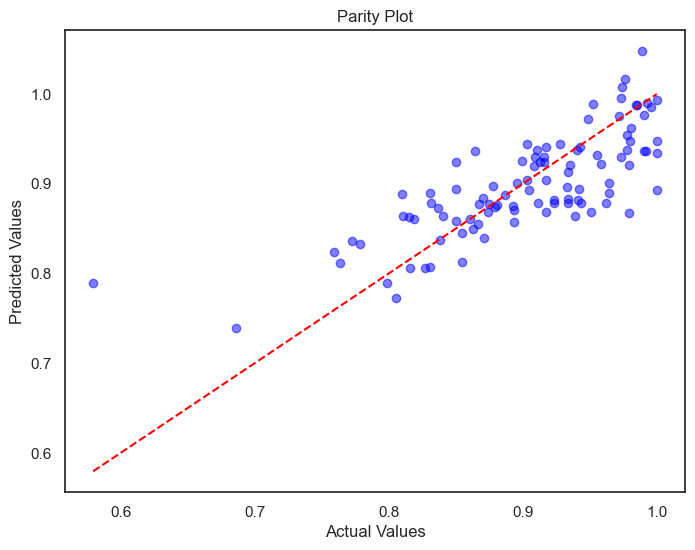

In [613]:
#Parity Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot')
plt.show()

(41, 41)


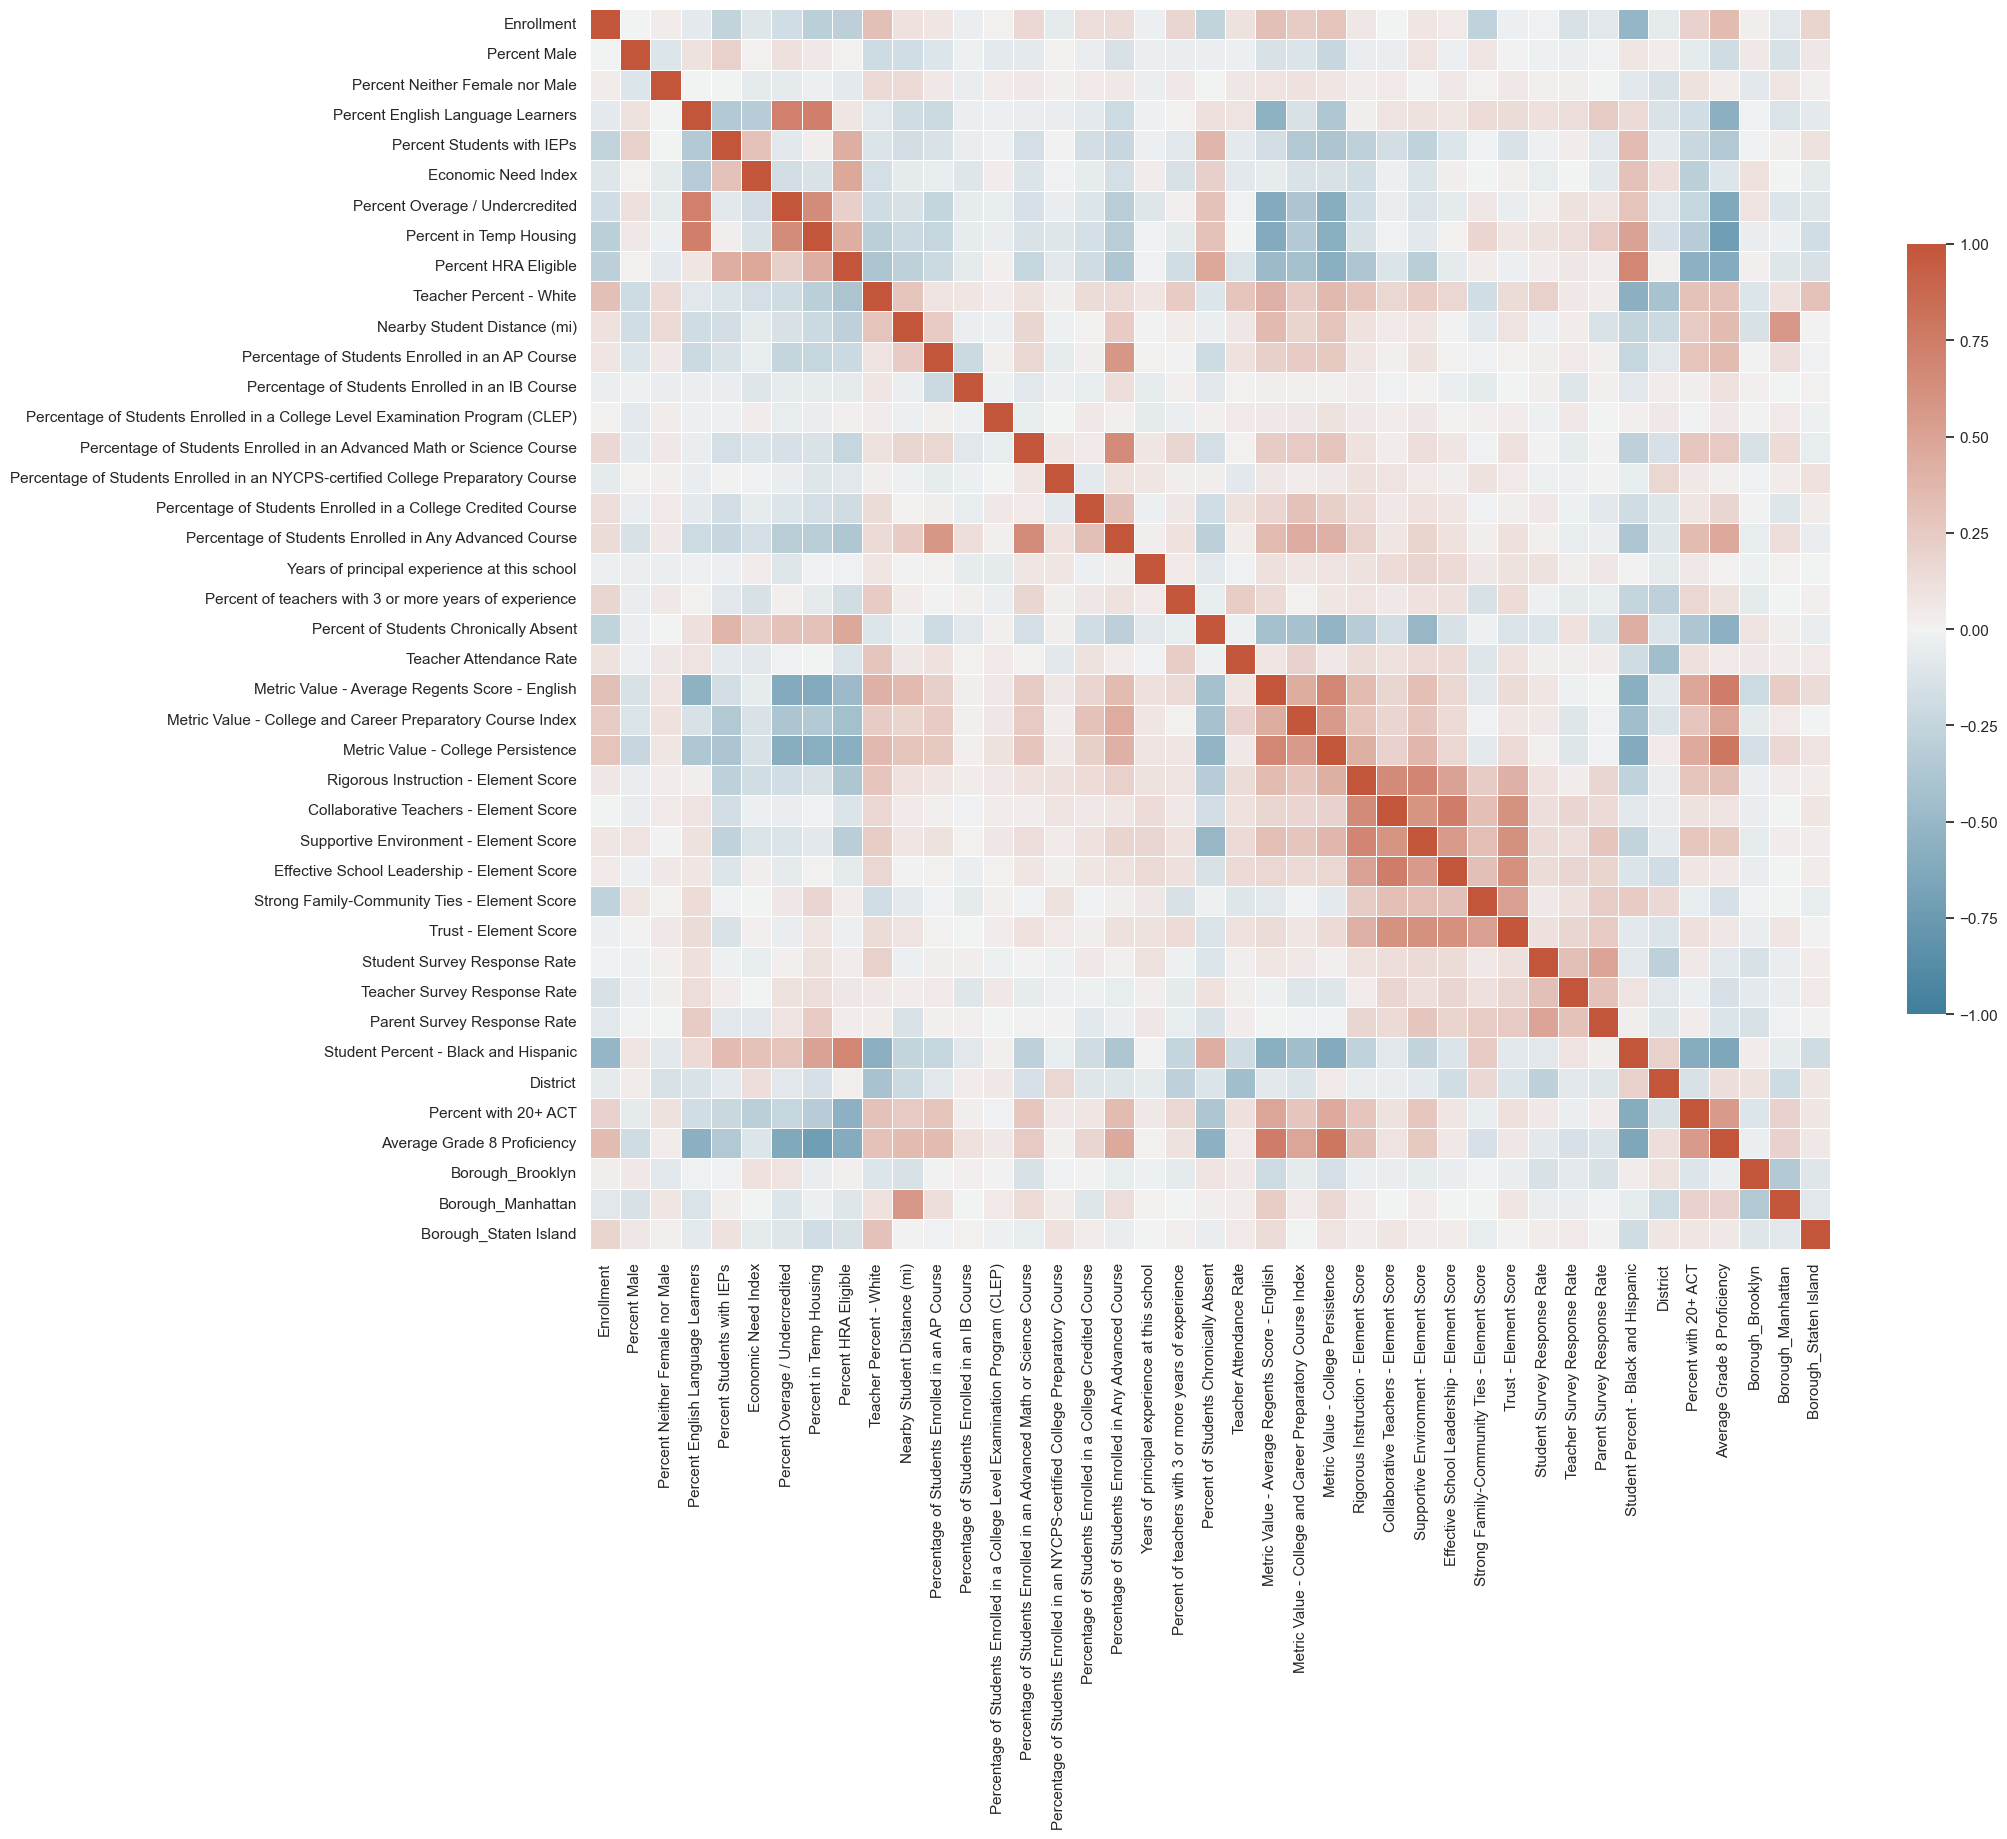

In [606]:
corr = X.corr()
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()